# Лабораторна робота №3 "EDA and Supervised Learning"
### Виконала:
Студентка групи ДА-01 <br>
ННК «ІПСА» <br>
Борисенко Є.А. <br>
### Мета роботи:
навчитись робити передобробку даних та використовувати інструменти для кластеризації (Unsupervised Learning).
### Завдання:
- Прочитати опис та викачати дані з Kaggle змагання https://www.kaggle.com/c/titanic/data . 
- Обробити дані для подальшого використання у кластеризації (вирішити проблему з missing data, закодувати змінні).
- Провести кластеризацію даних за допомогою алгоритмів кластеризації з різними параметрами.
- Візуалізувати та оформити результати.



### Хід роботи:

#### Імпорт білбліотек та завантаження даних

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [2]:
print(train_data.shape)
print(test_data.shape)
train_data.dtypes

(891, 12)
(418, 11)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Сбалансованість:

In [3]:
train_data['Survived'].value_counts() * 100 / train_data['Survived'].shape[0]

0    61.616162
1    38.383838
Name: Survived, dtype: float64

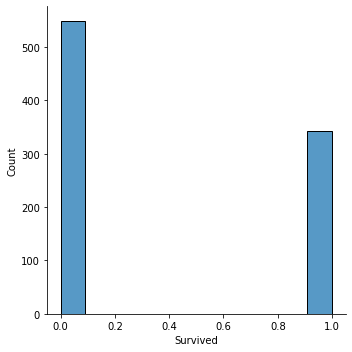

In [4]:
sns.displot(train_data['Survived'], kde=False);

Категоріальні змінні:

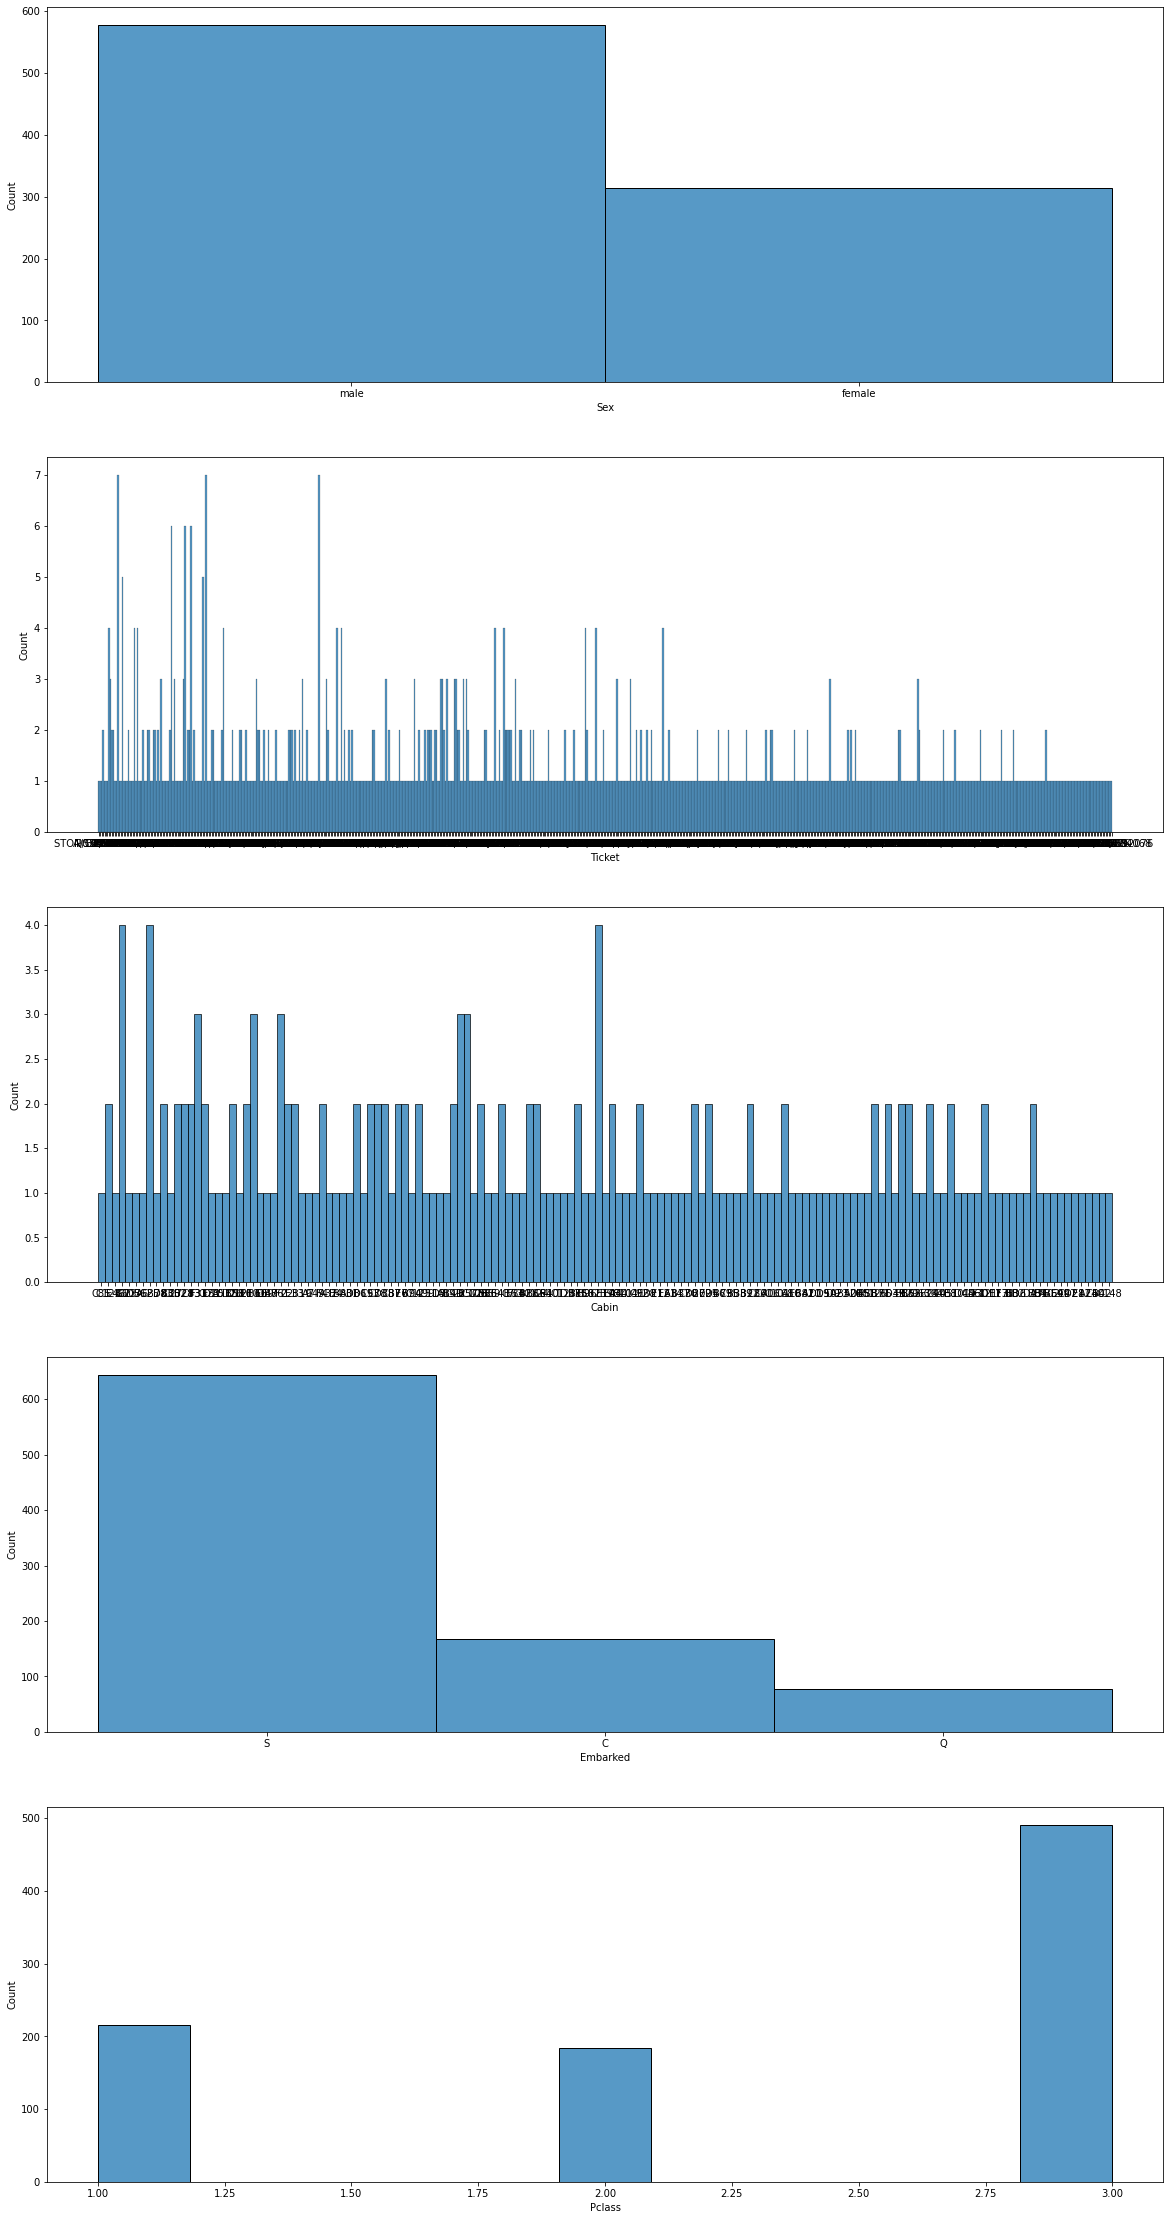

In [5]:
categorical_features = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(20, 40)

for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde=False, ax=axes[i])
plt.show()

Чисельні фічі

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

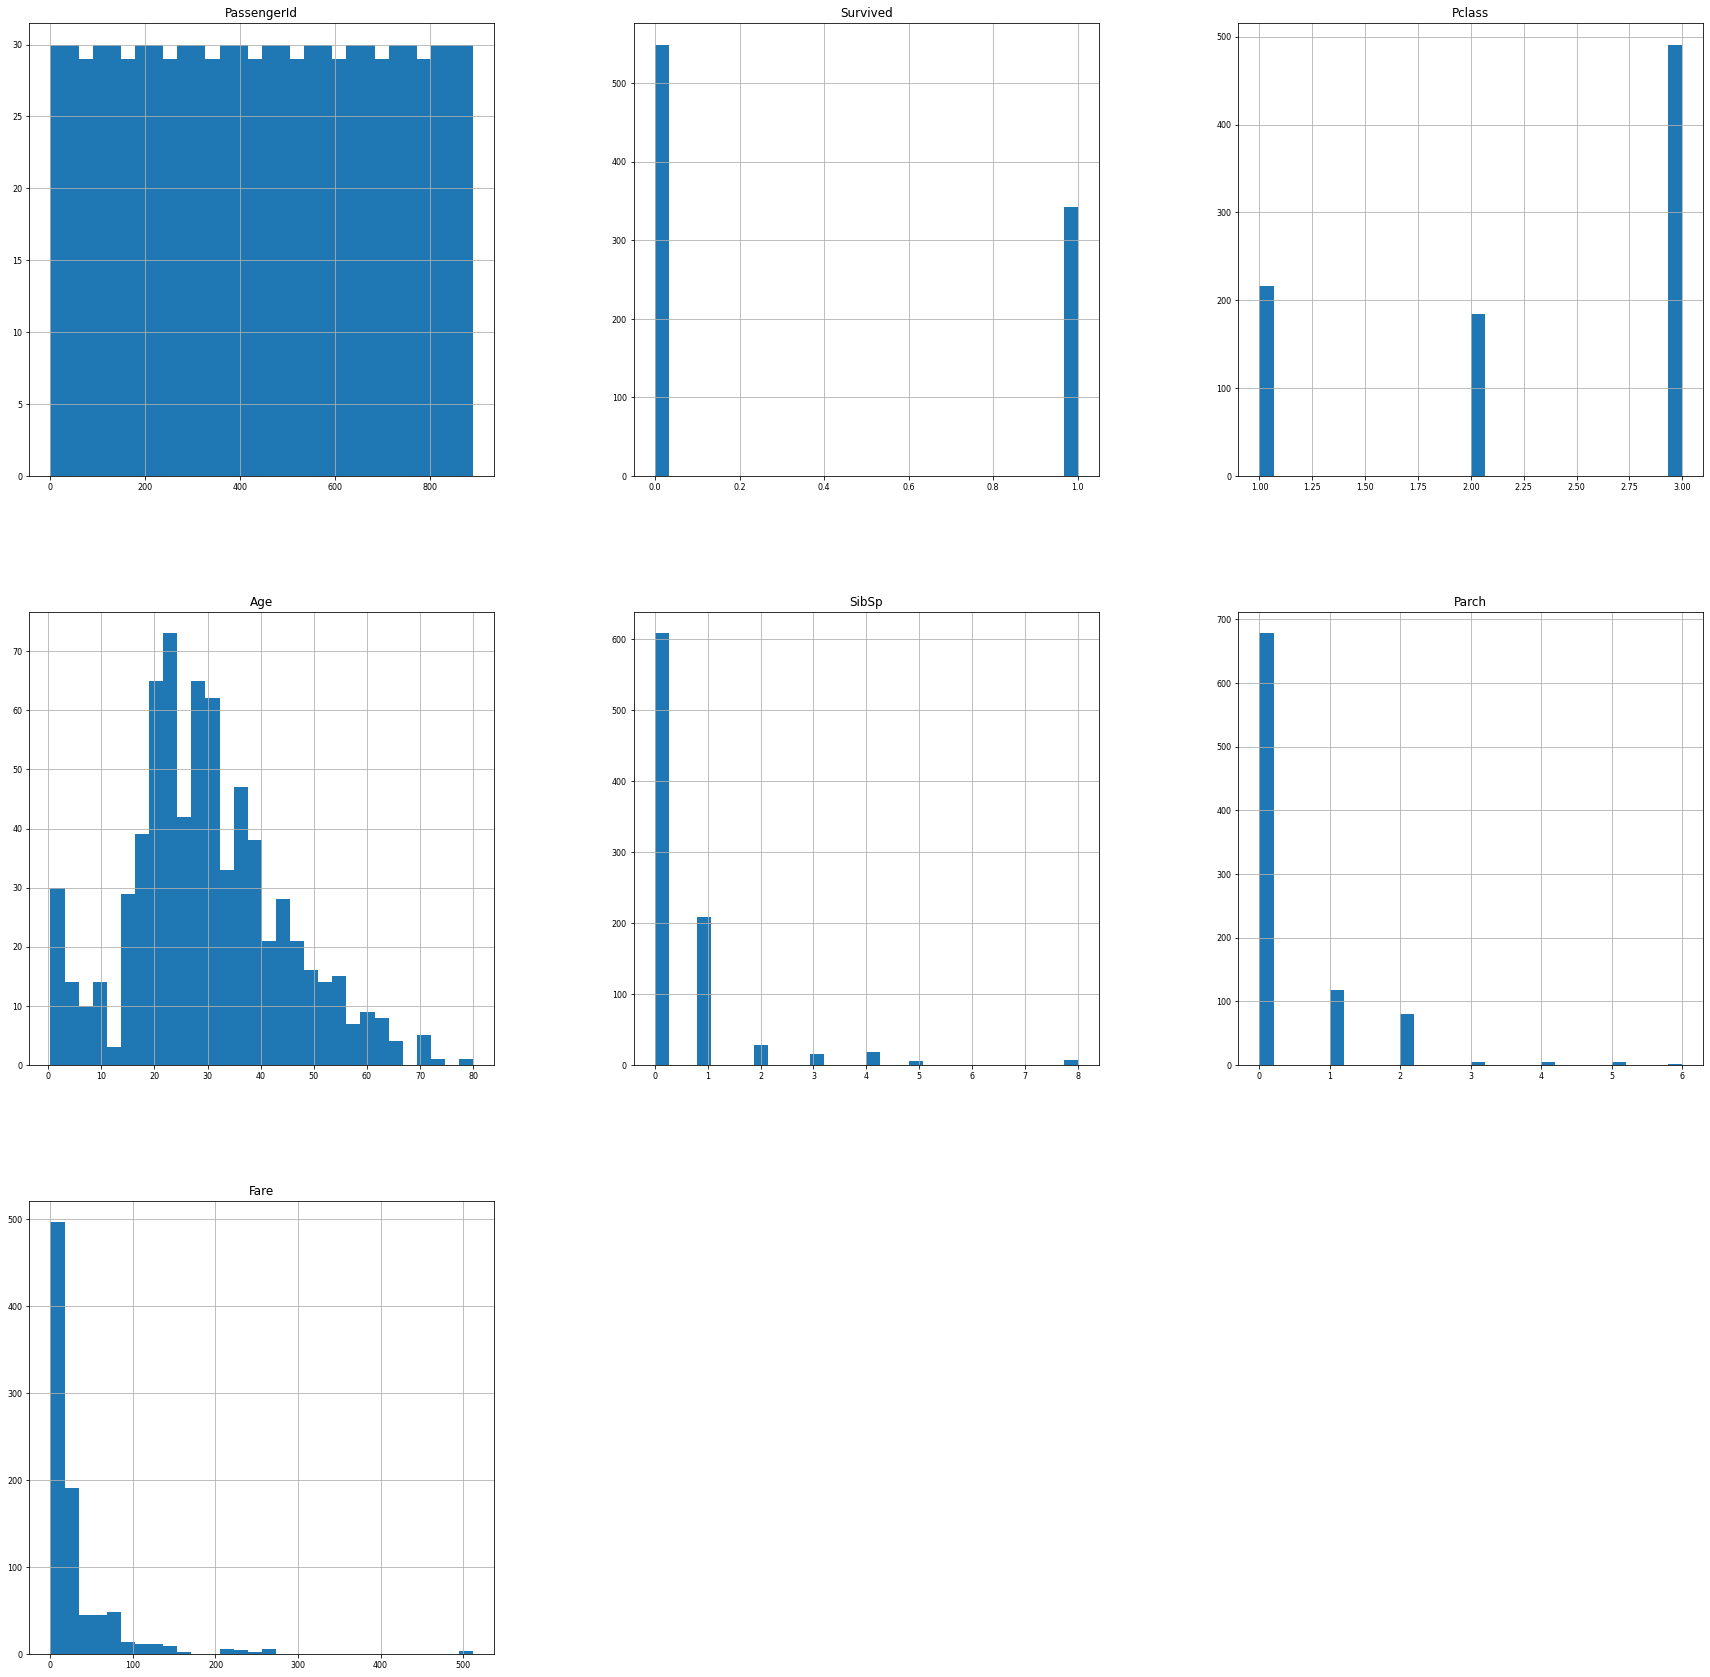

In [6]:
numerical_features =  train_data.select_dtypes(exclude=['category', 'object']).columns.tolist()
train_data[numerical_features].hist(figsize=(30, 30), bins=30, xlabelsize=8, ylabelsize=8)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

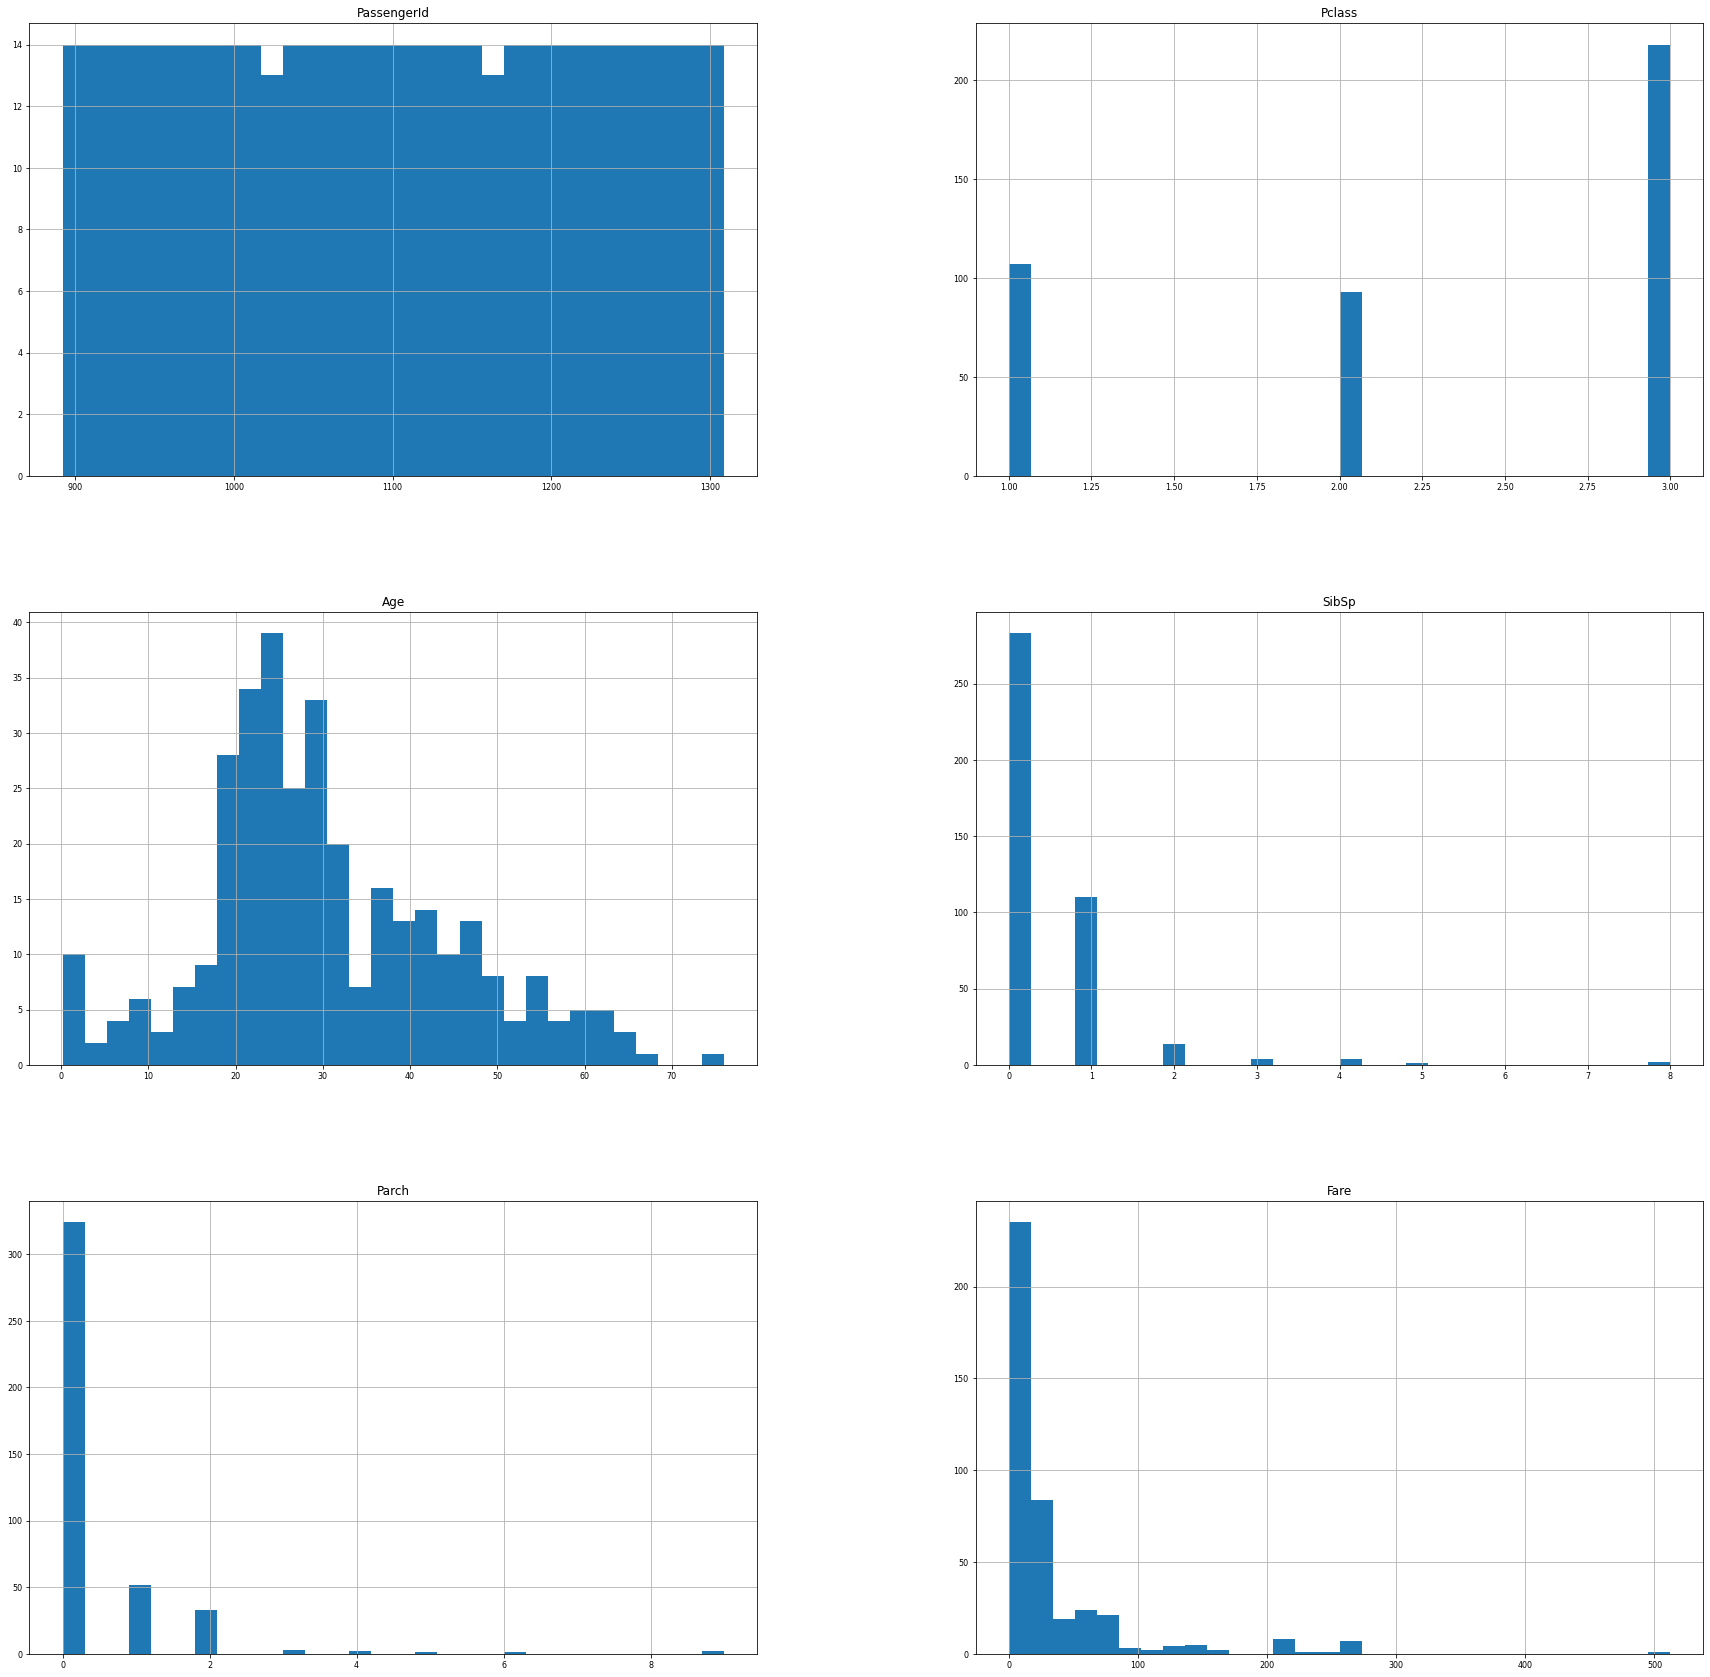

In [7]:
numerical_features.remove('Survived')
test_data[numerical_features].hist(figsize=(30, 30), bins=30, xlabelsize=8, ylabelsize=8)

Статистика:

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Перевіимо на outliers

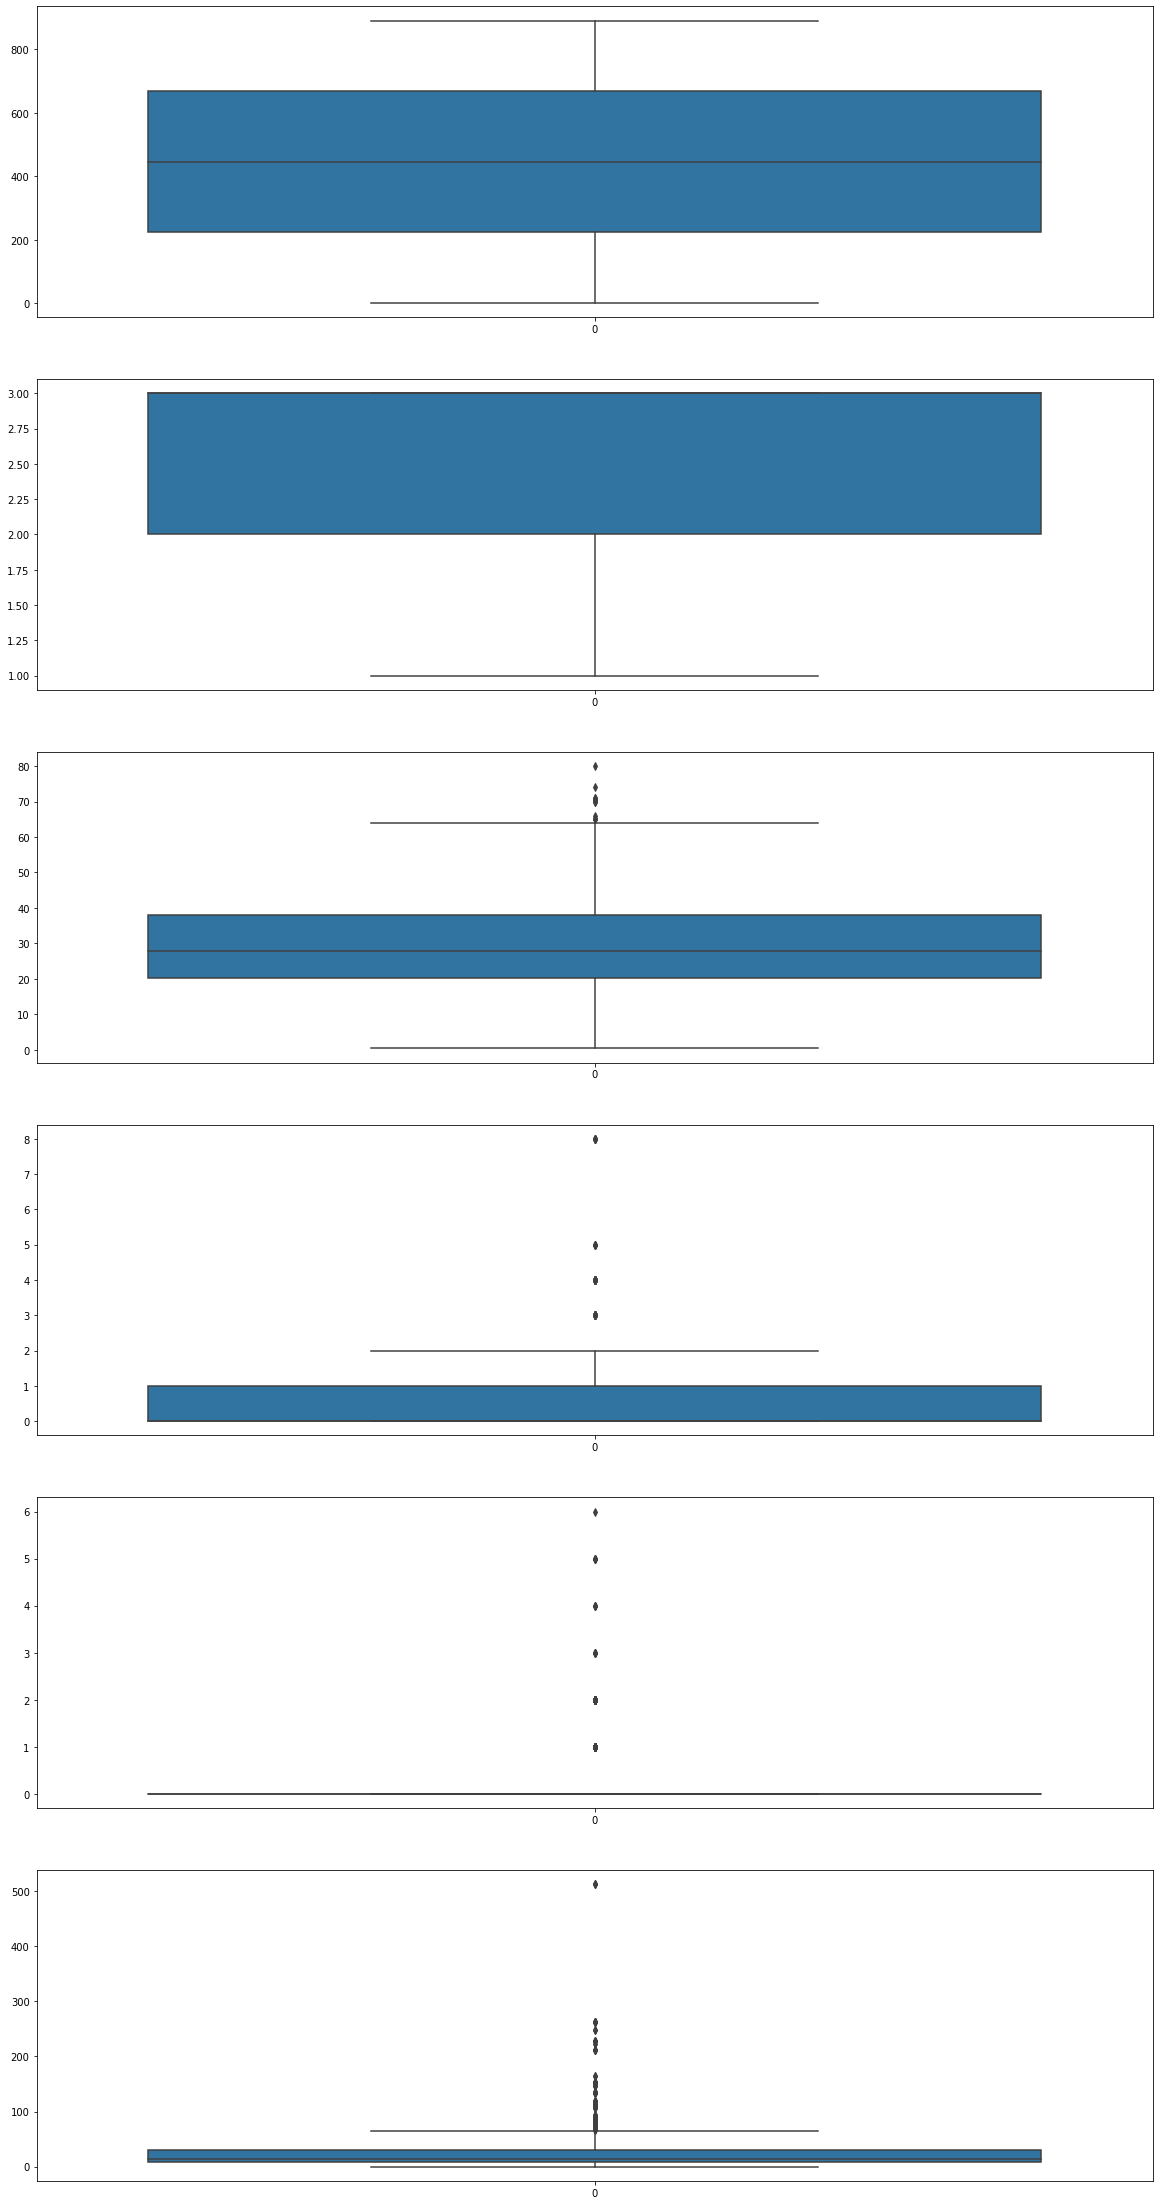

In [12]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(20, 40)
for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i])
plt.show()

Correlation Matrix

<AxesSubplot:>

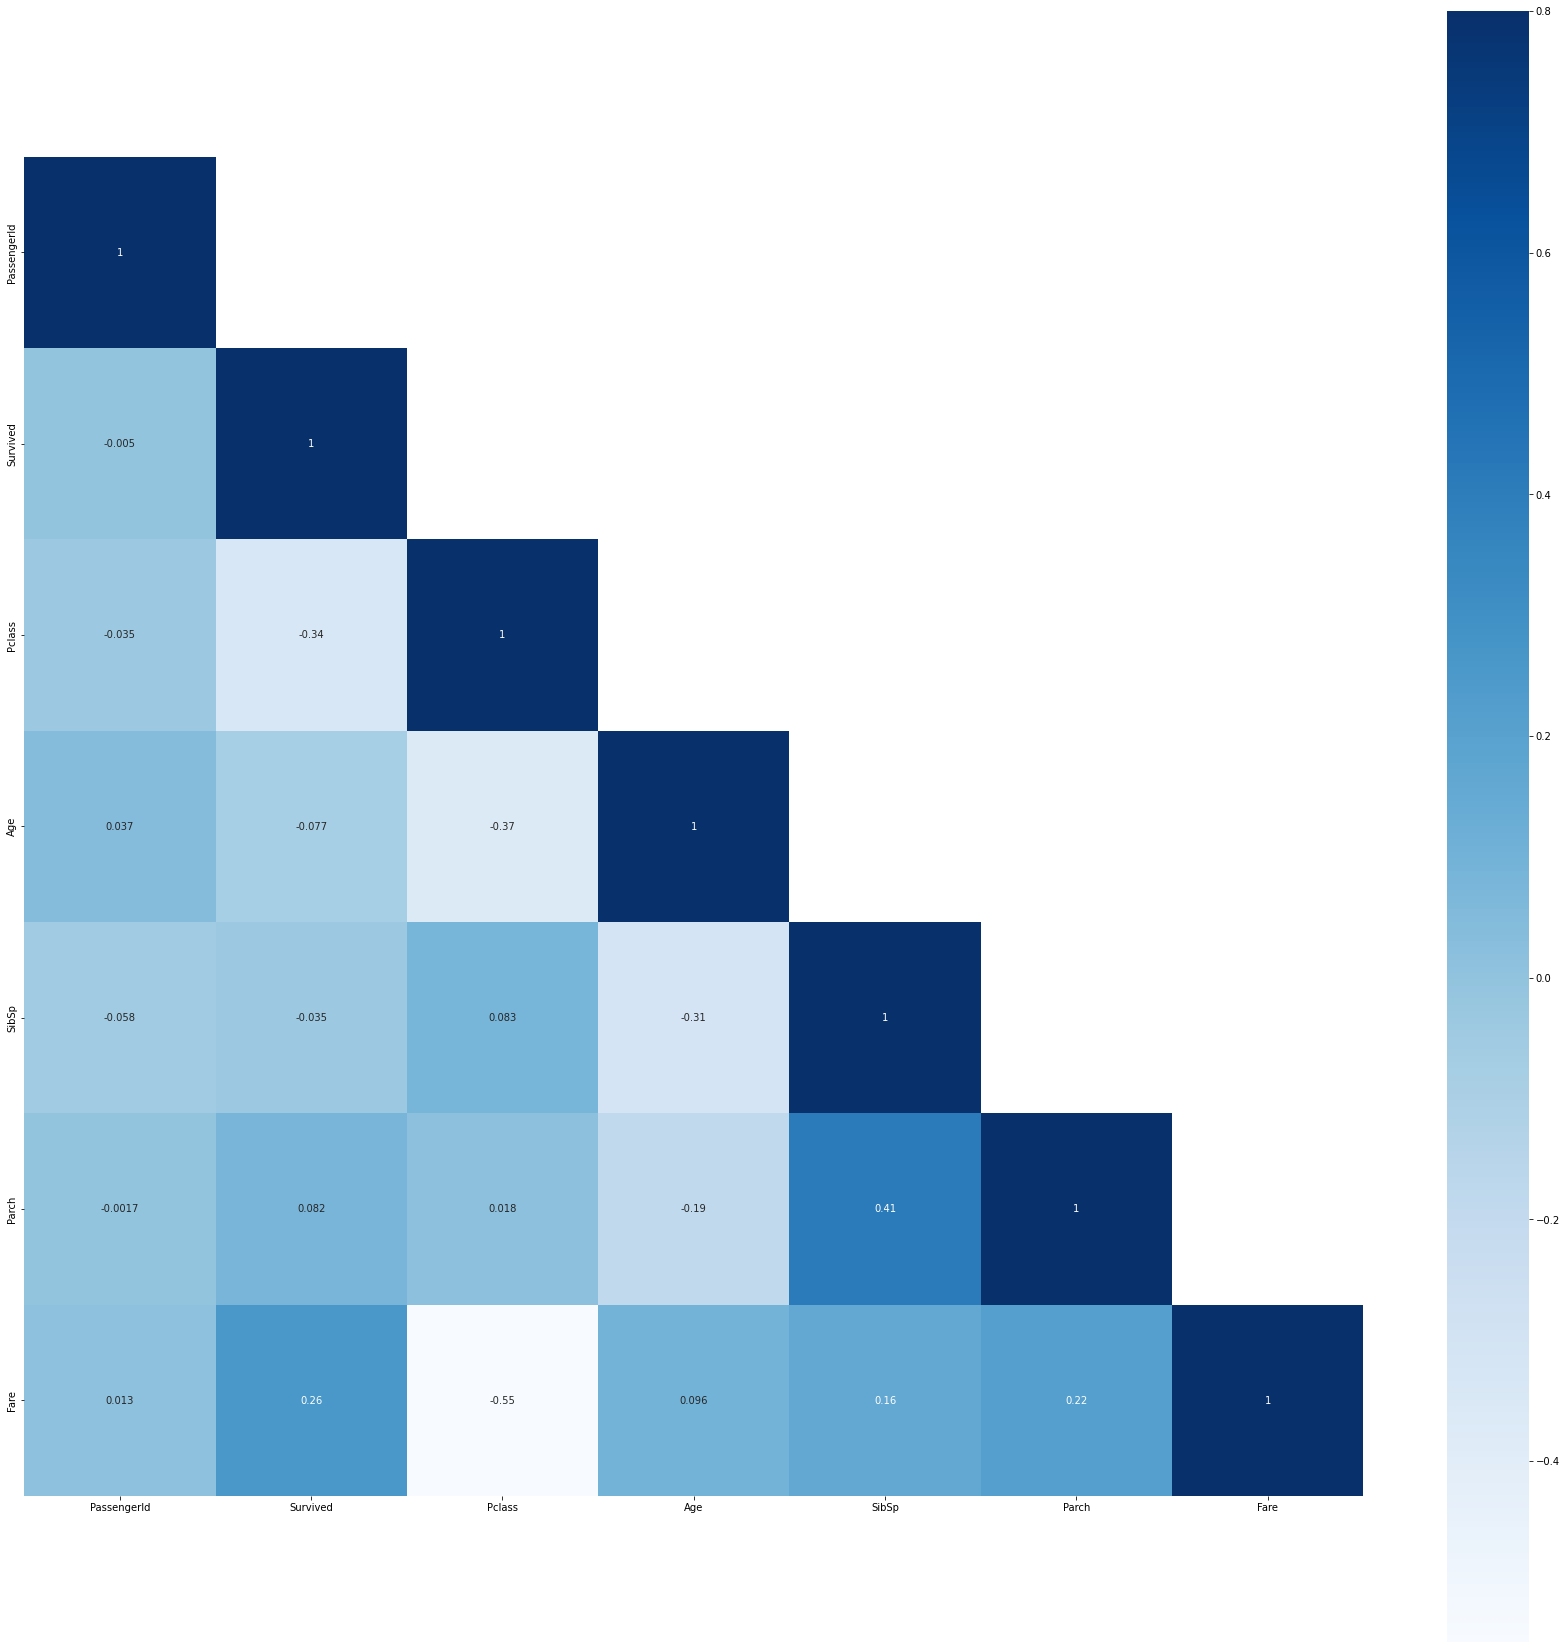

In [13]:
correlation_matrix =train_data.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(correlation_matrix,cmap="Blues", mask=mask, vmax=0.8, square=True, annot=True)

### Обробка даних

##### Missing values:

In [14]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Вирішуємо проблему пропущених значень у даних шляхом заповнення їх середніми та модальними значеннями.

1. Заповнюємо відсутні значення кабін (Cabin) у датафреймі train_data значеннями "Unknown".
2. Заповнюємо відсутні значення Fare середнім значенням плати за квиток для відповідного класу кают.
3. Заповнюємо відсутні значення Age середнім значенням віку пасажирів.
4. Заповнюємо відсутні значення Embarked модальним значенням  значення гавані посадки.
5. Виправлення значень Fare у датафреймі 
6. Створимо колонку isAlon

In [16]:
def imputing_missing_values(df):
    
    # Виправлення значень Fare у датафреймі 
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    
    #  Спеціальний кейс для Cabin
    df['Cabin'] = df['Cabin'].fillna('Unknown') 
    
    # обчислення середніх значень Fare для кожного Pclass
    classmeans = df.pivot_table('Fare', index='Pclass', aggfunc='mean')
    
    # заповнення пропущених значень Fare залежно від Pclass
    df.Fare = df.loc[:, ['Fare', 'Pclass']].apply(lambda x: classmeans.get(x['Pclass'], 0) if pd.isnull(x['Fare']) else x['Fare'], axis=1 )
    
    # заповнення пропущених значень Age середнім значенням
    meanAge=np.mean(df.Age)
    df.Age=df.Age.fillna(meanAge)
    
    # заповнення пропущених значень Embarked модою
    modeEmbarked = df.Embarked.mode()[0]
    df.Embarked = df.Embarked.fillna(modeEmbarked)
    
    return df
    
imputing_missing_values(train_data)
imputing_missing_values(test_data)
train_data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##### Duplicates

In [18]:
test_data.duplicated().sum()

0

In [19]:
train_data.duplicated().sum()

0

##### Feature engineering:

1. Стовпець імені наразі не використовується, але ми можемо витягти title. Зведемо title до місіс, міс, містера та майстра
2. Перетворюємо cabin number (номер кабини) у Deck (палубу)
3. Створимо колонку Family Size (розмір сім'ї)
4. Створимо колоку Fare per person (Оплата за людину)
5. Створимо колонку isAlone (наодинці)
6. Створимо колонку isChild (дитина)

In [20]:
import string

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

 
def feature_engineering(df):
    
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
    # 1. Замінюємо всі titles with mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Countess', 'Mme']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='male':
                return 'Mr'
            else:
                return 'Mrs'
        else:
            return title
    df['Title']=df.apply(replace_titles, axis=1)
    
    # 2. Перетворюємо cabin number (номер кабини) у Deck (палубу)
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
    
    # 3. Створимо колоку Family Size (розмір сім'ї)
    df['FamilySize']=df['SibSp']+df['Parch'] + 1
    
    # 4. Створимо колоку Fare per person (Оплата за людину)
    df['FarePerPerson']=df['Fare']/(df['FamilySize']+1)
    
    # 5.  Створимо колонку isAlone (наодинці)
    df['isAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)
    
    # 6. Створимо колонку isChild (дитина)
    df['isChild'] = (df['Age'] < 16).astype(int)

    return df

train_data = feature_engineering(train_data)
test_data = feature_engineering(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamilySize,FarePerPerson,isAlone,isChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown,2,2.416667,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,23.761100,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown,1,3.962500,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,17.700000,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown,1,4.025000,1,0


##### Кодуємо категоріальні фічі:

In [21]:
def feature_encoding(data):
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    encoded_data = pd.get_dummies(data, columns=['Pclass','Embarked','Deck','Title'])
    return encoded_data

train_data = feature_encoding(train_data)
test_data = feature_encoding(test_data)
train_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,...,0,0,0,0,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,...,0,0,0,0,0,1,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,...,0,0,0,0,0,1,0,0,1,0


##### Feature importance:

1. Оскільки в нас вже є фіча 'Deck', можемо позбутися 'Cabin'
2. Оскільки в нас вже є фіча 'Title', можемо позбутися 'Name'
3. Позбудемось 'Ticket' 
4. Позбудемось 'PassengerId', не має значення для кластеризації

In [22]:
ID_train = train_data['PassengerId'].copy()
ID_test = test_data['PassengerId'].copy()

def drop_features(df):
    if 'Cabin' in df.columns:
        df.drop(['Cabin'], axis=1, inplace=True)
    if 'Name' in df.columns:
        df.drop(['Name'], axis=1, inplace=True)
    if 'Ticket' in df.columns:
        df.drop(['Ticket'], axis=1, inplace=True)
    if 'PassengerId' in df.columns:
        df.drop(['PassengerId'], axis=1, inplace=True)
    return df

train_data = drop_features(train_data)
test_data = drop_features(test_data)
train_data.dtypes

Survived           int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
FamilySize         int64
FarePerPerson    float64
isAlone            int32
isChild            int32
Pclass_1           uint8
Pclass_2           uint8
Pclass_3           uint8
Embarked_C         uint8
Embarked_Q         uint8
Embarked_S         uint8
Deck_A             uint8
Deck_B             uint8
Deck_C             uint8
Deck_D             uint8
Deck_E             uint8
Deck_F             uint8
Deck_G             uint8
Deck_T             uint8
Deck_Unknown       uint8
Title_Master       uint8
Title_Miss         uint8
Title_Mr           uint8
Title_Mrs          uint8
dtype: object

##### Balancing data:

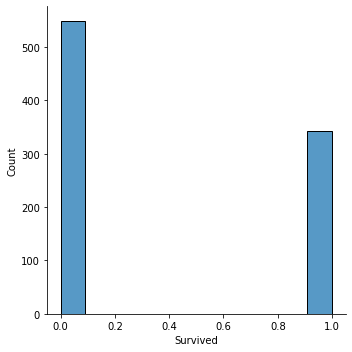

In [23]:
sns.displot(train_data['Survived'], kde=False);

Будемо використовувати undersampling метод.

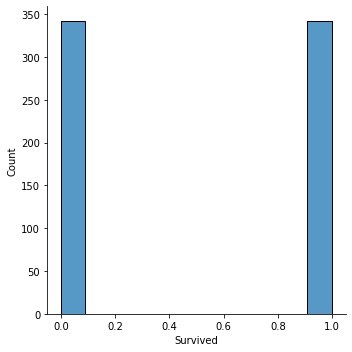

In [24]:
from sklearn.utils import resample

def balancing(df):
    df_majority = df[df['Survived']==0]
    df_minority = df[df['Survived']==1]

    df_majority_downsampled = resample(df_majority, replace=False, n_samples=df_minority.shape[0], random_state=42)
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    return df_downsampled

train_data = balancing(train_data)
sns.displot(train_data['Survived'], kde=False);

### Кластерізація

Виведемо таргет  подальшого порівняння з результатом кластерізації

In [25]:
y = train_data['Survived'].copy()
train_data.groupby('Survived').mean()

,Sex,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,isAlone,isChild,Pclass_1,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Title_Master,Title_Miss,Title_Mr,Title_Mrs
Survived,,,,,,,,,,,,,,,,,,,,,
0,0.154971,31.212959,0.453216,0.318713,20.942872,1.771930,7.968653,0.692982,0.046784,0.146199,...,0.008772,0.017544,0.002924,0.002924,0.002924,0.894737,0.026316,0.096491,0.818713,0.058480
1,0.681287,28.549778,0.473684,0.464912,48.395408,1.938596,17.426387,0.476608,0.143275,0.397661,...,0.073099,0.073099,0.020468,0.005848,0.000000,0.602339,0.067251,0.374269,0.251462,0.307018


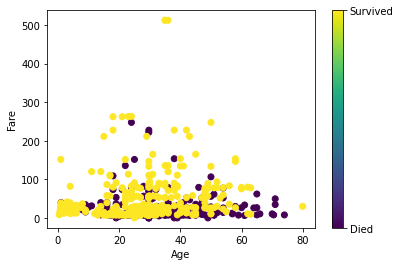

In [26]:
import matplotlib.pyplot as plt

def plot(df, feature1, feature2):
    plt.scatter(df[feature1], df[feature2], c=df['Survived'])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    cbar = plt.colorbar()
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['Died', 'Survived'])
    plt.show()

plot(train_data,'Age','Fare')

Позбудемось 'Survived'

In [27]:
train_data.drop(['Survived'],inplace=True,axis=1)

#### KMeans

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def kmeans(data):
    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    kmeans = KMeans(n_clusters = 2,n_init ='auto', random_state=42)
    kmeans.fit(data_scaled)
    data['cluster'] = kmeans.labels_
    return data
    
data1 = train_data.copy()
result_kmeans = kmeans(data1)
result_kmeans.groupby('cluster').mean()

,Sex,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,isAlone,isChild,Pclass_1,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Title_Master,Title_Miss,Title_Mr,Title_Mrs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,32.796984,0.208451,0.070423,21.635844,1.278873,9.282377,0.794366,0.000000,0.239437,...,0.028169,0.039437,0.002817,0.000000,0.002817,0.816901,0.000000,0.000000,1.000000,0.000000
1,0.869301,26.735340,0.738602,0.738602,48.732422,2.477204,16.382553,0.358663,0.197568,0.306991,...,0.054711,0.051672,0.021277,0.009119,0.000000,0.674772,0.097264,0.489362,0.033435,0.379939


Візуалізуємо результат:

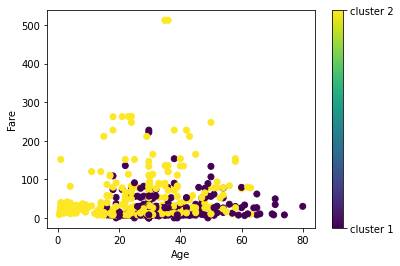

In [29]:
import matplotlib.pyplot as plt

def plot(df, feature1, feature2):
    plt.scatter(df[feature1], df[feature2], c=df['cluster'])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    cbar = plt.colorbar()
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['cluster 1', 'cluster 2'])

    plt.show()

plot(result_kmeans,'Age','Fare')

####  Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

def agg(data):
    
    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    agg = AgglomerativeClustering(n_clusters=2).fit(data_scaled)

    data['cluster'] = agg.labels_
    return data

data2 = train_data.copy()
result_agg = agg(data2)
result_agg.groupby('cluster').mean()

,Sex,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,isAlone,isChild,Pclass_1,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Title_Master,Title_Miss,Title_Mr,Title_Mrs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.374761,27.844494,0.481836,0.407266,18.689252,1.889101,6.631255,0.613767,0.120459,0.066922,...,0.000000,0.001912,0.015296,0.005736,0.000000,0.971319,0.061185,0.221797,0.564054,0.152964
1,0.559006,36.498049,0.403727,0.341615,86.578961,1.745342,32.403463,0.490683,0.012422,0.937888,...,0.173913,0.186335,0.000000,0.000000,0.006211,0.024845,0.000000,0.279503,0.440994,0.279503


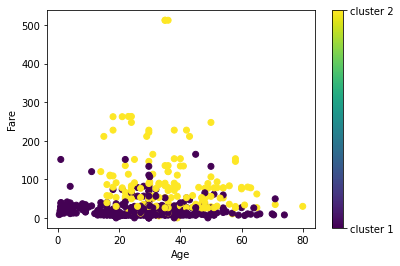

In [31]:
plot(result_agg,'Age','Fare')